# 1. Rice multiseries stock price prediction

This is the second a

In [4]:
path = "drive/MyDrive/COGS_Project/EDA/Data/"

In [5]:
import os
import pandas as pd

In [6]:
os.listdir(path)

['Univariate_Rice_Price_Change.csv', 'Multivariate_stock_preprocessed.csv']

In [7]:
df = pd.read_csv(path+'Multivariate_stock_preprocessed.csv')

In [8]:
df

,Unnamed: 0,ZR=F_Open,ZR=F_High,ZR=F_Low,ZR=F_Close,ZR=F_Adj_Close,ZR=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Adj_Close,CL=F_Volume,ZW=F_Open,ZW=F_High,ZW=F_Low,ZW=F_Close,ZW=F_Adj_Close,ZW=F_Volume
0,2015-01-23,0.397375,0.401925,0.375000,0.373798,0.373798,0.476089,0.286604,0.292522,0.258267,0.251462,0.251462,0.241807,0.751689,0.744538,0.752197,0.738983,0.738983,0.536428
1,2015-01-24,0.516706,0.525872,0.531863,0.532452,0.532452,0.502125,0.478712,0.478261,0.471284,0.480564,0.480564,0.509501,0.516892,0.534454,0.511424,0.520339,0.520339,0.493559
2,2015-01-25,0.516706,0.525872,0.531863,0.532452,0.532452,0.502125,0.478712,0.478261,0.471284,0.480564,0.480564,0.509501,0.516892,0.534454,0.511424,0.520339,0.520339,0.493559
3,2015-01-26,0.356802,0.344164,0.338235,0.343750,0.343750,0.400638,0.237106,0.245565,0.228333,0.236326,0.236326,0.130318,0.738176,0.736134,0.702988,0.674576,0.674576,0.471678
4,2015-01-27,0.331742,0.400722,0.357843,0.364183,0.364183,0.409139,0.234683,0.250435,0.244344,0.273478,0.273478,0.134702,0.662162,0.665546,0.690685,0.664407,0.664407,0.314774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,2021-12-02,0.516706,0.525872,0.531863,0.532452,0.532452,0.502125,0.478712,0.478261,0.471284,0.480564,0.480564,0.509501,0.516892,0.534454,0.511424,0.520339,0.520339,0.493559
1258,2021-12-03,0.516706,0.525872,0.531863,0.532452,0.532452,0.502125,0.478712,0.478261,0.471284,0.480564,0.480564,0.509501,0.516892,0.534454,0.511424,0.520339,0.520339,0.493559
1259,2021-12-04,0.516706,0.525872,0.531863,0.532452,0.532452,0.502125,0.478712,0.478261,0.471284,0.480564,0.480564,0.509501,0.516892,0.534454,0.511424,0.520339,0.520339,0.493559
1260,2021-12-05,0.516706,0.525872,0.531863,0.532452,0.532452,0.502125,0.478712,0.478261,0.471284,0.480564,0.480564,0.509501,0.516892,0.534454,0.511424,0.520339,0.520339,0.493559


In [38]:
combined_set=df.iloc[:,[1,4,7,10,13,16]]

In [39]:
#combined_set.columns = np.arange(0,len(combined_set.columns))


In [40]:
change_name_list = []
for i in range(len(combined_set.columns)):
  change_name = str(combined_set.columns[i]) + "_" + str(i)
  change_name_list.append(change_name)
combined_set.columns  =change_name_list
  


In [41]:
combined_set

,ZR=F_Open_0,ZR=F_Close_1,CL=F_Open_2,CL=F_Close_3,ZW=F_Open_4,ZW=F_Close_5
0,0.397375,0.373798,0.286604,0.251462,0.751689,0.738983
1,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339
2,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339
3,0.356802,0.343750,0.237106,0.236326,0.738176,0.674576
4,0.331742,0.364183,0.234683,0.273478,0.662162,0.664407
...,...,...,...,...,...,...
1257,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339
1258,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339
1259,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339
1260,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339


In [42]:
df_list = []
for i in range(1,len(combined_set.columns),2):
  new_col = combined_set[combined_set.columns[i]] - combined_set[combined_set.columns[i-1]]
  df_list.append(new_col)
df_list

[0      -0.023577
 1       0.015745
 2       0.015745
 3      -0.013052
 4       0.032440
           ...   
 1257    0.015745
 1258    0.015745
 1259    0.015745
 1260    0.015745
 1261    0.015745
 Length: 1262, dtype: float64, 0      -0.035142
 1       0.001852
 2       0.001852
 3      -0.000780
 4       0.038795
           ...   
 1257    0.001852
 1258    0.001852
 1259    0.001852
 1260    0.001852
 1261    0.001852
 Length: 1262, dtype: float64, 0      -0.012706
 1       0.003447
 2       0.003447
 3      -0.063599
 4       0.002245
           ...   
 1257    0.003447
 1258    0.003447
 1259    0.003447
 1260    0.003447
 1261    0.003447
 Length: 1262, dtype: float64]

In [43]:
len(df_list)

3

In [44]:
df = df_list[0]

In [45]:
for x,i in enumerate(df_list):
  print(x)
  if x>0:
    print(i)
    df_i = i
    df = pd.concat([df,df_i],axis=1,join="inner")
  else:
    continue

0
1
0      -0.035142
1       0.001852
2       0.001852
3      -0.000780
4       0.038795
          ...   
1257    0.001852
1258    0.001852
1259    0.001852
1260    0.001852
1261    0.001852
Length: 1262, dtype: float64
2
0      -0.012706
1       0.003447
2       0.003447
3      -0.063599
4       0.002245
          ...   
1257    0.003447
1258    0.003447
1259    0.003447
1260    0.003447
1261    0.003447
Length: 1262, dtype: float64


In [46]:
df

,0,1,0
0,-0.023577,-0.035142,-0.012706
1,0.015745,0.001852,0.003447
2,0.015745,0.001852,0.003447
3,-0.013052,-0.000780,-0.063599
4,0.032440,0.038795,0.002245
...,...,...,...
1257,0.015745,0.001852,0.003447
1258,0.015745,0.001852,0.003447
1259,0.015745,0.001852,0.003447
1260,0.015745,0.001852,0.003447


In [47]:
df = df

In [48]:
df.columns[0:100]

Int64Index([0, 1, 0], dtype='int64')

In [51]:
training_set = df

###4. View Results

In [ ]:
original_test_set_old

,0,1,0,0,0,0
Date,,,,,,
2020-09-03,-6.030007,-67.874023,-6.500000,-117.000000,0.00,-13.209991
2020-09-04,0.889999,-33.219971,1.790009,-23.379883,-0.05,-3.490021
2020-09-08,-1.129997,-1.119995,-0.210022,5.840088,0.01,-3.759979
2020-09-09,0.059998,-0.570068,-1.300018,65.620117,0.02,2.549988
2020-09-10,-6.870003,-28.619995,-7.350006,-132.109864,-0.27,-6.910004
...,...,...,...,...,...,...
2021-11-11,-1.090012,-7.179932,1.290008,-40.500000,0.07,-1.250000
2021-11-12,1.560012,36.280029,1.636002,40.149902,0.18,3.440003
2021-11-15,-0.369995,-12.239990,-0.680008,8.679932,0.08,1.370025


In [ ]:
real_stock_price_original =original_test_set_old.iloc[:,0].values

In [ ]:
real_stock_price.shape

NameError: ignored

In [ ]:
real_stock_price = sc_y.fit_transform(real_stock_price_original.reshape(305,1))

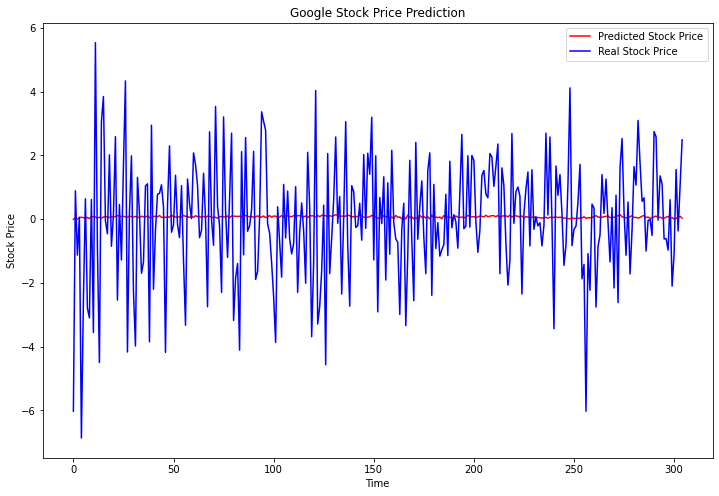

In [ ]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_stock_price_inverse,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price_original,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [52]:
training_set_old = training_set.iloc[:1500]

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
sc = MinMaxScaler(feature_range = (0, 1))
#training_set_scaled = sc.fit_transform(training_set_scaled)

In [55]:
training_set = training_set_old.values

In [56]:
#training_set_scaled = sc.fit_transform(training_set_scaled)

In [57]:
training_set = training_set.T

In [58]:
original_test_set_old = combined_set.iloc[1500:]

In [59]:
originial_test_set = original_test_set_old.values

In [60]:
originial_test_set = originial_test_set.T

In [61]:
originial_test_set.shape

(6, 0)

In [62]:
total_data=pd.concat([training_set_old,original_test_set_old],axis=0)

ValueError: ignored

In [26]:
total_data

,Unnamed: 0,ZR=F_Volume,CL=F_Volume,ZW=F_Volume
0,2015-01-23,0.476089,0.241807,0.536428
1,2015-01-24,0.502125,0.509501,0.493559
2,2015-01-25,0.502125,0.509501,0.493559
3,2015-01-26,0.400638,0.130318,0.471678
4,2015-01-27,0.409139,0.134702,0.314774
...,...,...,...,...
1257,2021-12-02,0.502125,0.509501,0.493559
1258,2021-12-03,0.502125,0.509501,0.493559
1259,2021-12-04,0.502125,0.509501,0.493559
1260,2021-12-05,0.502125,0.509501,0.493559


In [27]:
inputs=total_data[len(combined_set)-len(original_test_set_old)-60:]

In [ ]:
inputs

,Open,Open,Open,Open,Open,Open
Date,,,,,,
2020-06-10,86.974998,1459.540039,222.000000,2645.000000,9.36,406.500000
2020-06-11,87.327499,1442.479980,218.000000,2603.500000,8.20,392.690002
2020-06-12,86.180000,1428.489990,218.500000,2601.209961,8.50,393.329987
2020-06-15,83.312500,1390.800049,214.110001,2526.600098,7.81,373.279999
2020-06-16,87.864998,1445.219971,221.000000,2620.000000,8.80,386.559998
...,...,...,...,...,...,...
2021-11-11,148.960007,2942.139893,166.559998,3513.000000,10.11,337.140015
2021-11-12,148.429993,2956.629883,165.173996,3485.000000,10.05,335.619995
2021-11-15,150.369995,3000.000000,167.220001,3537.000000,10.25,339.549988


In [ ]:
training_set

array([[  25.5725  ,   25.450001,   25.15    , ...,  127.580002,
         132.759995,  137.589996],
       [ 589.880493,  592.194153,  585.243225, ..., 1647.890015,
        1636.630005, 1673.775024],
       [  92.699997,   92.699997,   88.940002, ...,  288.619995,
         289.200012,  299.      ],
       [ 327.600006,  328.48999 ,  322.459991, ..., 3408.98999 ,
        3489.580078, 3547.      ],
       [  17.08    ,   15.83    ,   16.1     , ...,    8.36    ,
           8.47    ,    8.72    ],
       [ 180.490005,  179.720001,  178.529999, ...,  392.170013,
         387.820007,  385.149994]])

In [ ]:
training_set

array([[  25.5725  ,   25.450001,   25.15    , ...,  127.580002,
         132.759995,  137.589996],
       [ 589.880493,  592.194153,  585.243225, ..., 1647.890015,
        1636.630005, 1673.775024],
       [  92.699997,   92.699997,   88.940002, ...,  288.619995,
         289.200012,  299.      ],
       [ 327.600006,  328.48999 ,  322.459991, ..., 3408.98999 ,
        3489.580078, 3547.      ],
       [  17.08    ,   15.83    ,   16.1     , ...,    8.36    ,
           8.47    ,    8.72    ],
       [ 180.490005,  179.720001,  178.529999, ...,  392.170013,
         387.820007,  385.149994]])

In [ ]:
#sc = MinMaxScaler(feature_range = (0, 1))
#training_set_scaled = sc.fit_transform(training_set)
#test_set_scaled = sc.fit_transform(test_set)

In [ ]:
#training_set_scaled.shape

In [ ]:
#training_set_scaled = training_set_scaled.T

In [ ]:
#training_set = training_set.T

In [ ]:
#test_set_scaled 

In [ ]:
training_set_scaled = training_set

In [ ]:
training_set_scaled

array([[  25.5725  ,   25.450001,   25.15    , ...,  127.580002,
         132.759995,  137.589996],
       [ 589.880493,  592.194153,  585.243225, ..., 1647.890015,
        1636.630005, 1673.775024],
       [  92.699997,   92.699997,   88.940002, ...,  288.619995,
         289.200012,  299.      ],
       [ 327.600006,  328.48999 ,  322.459991, ..., 3408.98999 ,
        3489.580078, 3547.      ],
       [  17.08    ,   15.83    ,   16.1     , ...,    8.36    ,
           8.47    ,    8.72    ],
       [ 180.490005,  179.720001,  178.529999, ...,  392.170013,
         387.820007,  385.149994]])

In [ ]:
X_train=[]
y_train=[]
X_test = []
y_test = []
for i in range(60,training_set_scaled.shape[1]):
    for x in range(6):
      X_train.append(training_set_scaled[x][i-60:i])
    y_train.append(training_set_scaled[0][i])
#for i in range(60,test_set_scaled.shape[1]):
 # for x in range(6):
 #     X_test.append(test_set_scaled[x][i-60:i])
  #    y_test.append(test_set_scaled[x][i])


X_train, y_train= np.array(X_train), np.array(y_train)

In [ ]:
sc_x = MinMaxScaler(feature_range = (0, 1))
sc_y = MinMaxScaler(feature_range = (0, 1))

In [ ]:
X_train.shape

(8640, 60)

In [ ]:
X_train.shape[0]/6

1440.0

In [ ]:
X_train = X_train.reshape(1440,60,6)

In [ ]:
y_train = y_train.reshape(1440,1)

In [ ]:
y_train.shape

(1440, 1)

In [ ]:
X_train.shape

(1440, 60, 6)

In [ ]:
X_train.shape

(1440, 60, 6)

In [ ]:
y_train

array([[ 27.674999],
       [ 26.592501],
       [ 26.780001],
       ...,
       [127.580002],
       [132.759995],
       [137.589996]])

In [ ]:
X_train = X_train.reshape(X_train.shape[0]*X_train.shape[1],6)

In [ ]:
X_train.shape

(86400, 6)

In [ ]:
X_train = sc_x.fit_transform(X_train)

In [ ]:
y_train = sc_y.fit_transform(y_train)


In [ ]:
y_train.shape

(1440, 1)

In [ ]:
X_train = X_train.reshape(1440, 60, 6)

In [ ]:
regressor= Sequential()
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
regressor.add(Dropout(0.4))
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
45/45 [==============================] - 14s 198ms/step - loss: 0.0120
Epoch 2/20
45/45 [==============================] - 9s 196ms/step - loss: 0.0059
Epoch 3/20
45/45 [==============================] - 9s 196ms/step - loss: 0.0051
Epoch 4/20
45/45 [==============================] - 9s 196ms/step - loss: 0.0049
Epoch 5/20
45/45 [==============================] - 9s 194ms/step - loss: 0.0057
Epoch 6/20
45/45 [==============================] - 9s 195ms/step - loss: 0.0047
Epoch 7/20
45/45 [==============================] - 9s 193ms/step - loss: 0.0041
Epoch 8/20
45/45 [==============================] - 9s 196ms/step - loss: 0.0054
Epoch 9/20
45/45 [==============================] - 9s 196ms/step - loss: 0.0044
Epoch 10/20
45/45 [==============================] - 9s 194ms/step - loss: 0.0040
Epoch 11/20
45/45 [==============================] - 9s 195ms/step - loss: 0.0041
Epoch 12/20
45/45 [==============================] - 9s 193ms/step - loss: 0.0046
Epoch 13/20
45/45 [=====

In [63]:
inputs.shape

(60, 4)

In [64]:
originial_test_set.shape

(6, 0)

In [65]:
inputs=total_data[len(combined_set)-len(original_test_set_old)-60:]

In [66]:
inputs_pass = inputs.values

In [67]:
inputs = sc_x.fit_transform(inputs_pass.T)

NameError: ignored

In [69]:
inputs

,Unnamed: 0,ZR=F_Volume,CL=F_Volume,ZW=F_Volume
1202,2021-09-25,0.502125,0.509501,0.493559
1203,2021-10-01,0.502125,0.509501,0.493559
1204,2021-10-02,0.502125,0.509501,0.493559
1205,2021-10-08,0.502125,0.509501,0.493559
1206,2021-10-09,0.502125,0.509501,0.493559
1207,2021-10-13,0.502125,0.509501,0.493559
1208,2021-10-14,0.502125,0.509501,0.493559
1209,2021-10-15,0.502125,0.509501,0.493559
1210,2021-10-16,0.502125,0.509501,0.493559
1211,2021-10-17,0.502125,0.509501,0.493559


In [ ]:
X_test=[]
for i in range(60,365):
    for x in range(0,6):
      X_test.append(inputs[x][i-60:i])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
X_test = X_test.reshape(305,60,6)

In [ ]:
predicted_stock_price=regressor.predict(X_test)

In [ ]:
predicted_stock_price_inverse= sc_y.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price_inverse

array([[127.59564 ],
       [127.55291 ],
       [127.51515 ],
       [127.503136],
       [127.46684 ],
       [127.40155 ],
       [127.33825 ],
       [127.309326],
       [127.29042 ],
       [127.308464],
       [127.298805],
       [127.26603 ],
       [127.23045 ],
       [127.21934 ],
       [127.20248 ],
       [127.2147  ],
       [127.200005],
       [127.17762 ],
       [127.14731 ],
       [127.15255 ],
       [127.16151 ],
       [127.19211 ],
       [127.21509 ],
       [127.21407 ],
       [127.200516],
       [127.19592 ],
       [127.18309 ],
       [127.19331 ],
       [127.18367 ],
       [127.17572 ],
       [127.1638  ],
       [127.1531  ],
       [127.137115],
       [127.15296 ],
       [127.16339 ],
       [127.17422 ],
       [127.18043 ],
       [127.20651 ],
       [127.221466],
       [127.230354],
       [127.23034 ],
       [127.261826],
       [127.30944 ],
       [127.35745 ],
       [127.379295],
       [127.374275],
       [127.363396],
       [127.3

###4. View Results

In [ ]:
original_test_set_old

,Open,Open,Open,Open,Open,Open
Date,,,,,,
2020-09-03,126.910004,1709.713989,289.000000,3485.000000,8.80,399.500000
2020-09-04,120.070000,1624.260010,279.600006,3318.000000,8.86,388.510010
2020-09-08,113.949997,1533.510010,270.230011,3144.000000,8.39,383.989990
2020-09-09,117.260002,1557.530029,274.450012,3202.989990,8.64,382.690002
2020-09-10,120.360001,1560.640015,274.899994,3307.219971,8.61,386.019989
...,...,...,...,...,...,...
2021-11-11,148.960007,2942.139893,166.559998,3513.000000,10.11,337.140015
2021-11-12,148.429993,2956.629883,165.173996,3485.000000,10.05,335.619995
2021-11-15,150.369995,3000.000000,167.220001,3537.000000,10.25,339.549988


In [ ]:
real_stock_price_original =original_test_set_old.iloc[:,0].values

In [ ]:
real_stock_price.shape

(305, 1)

In [ ]:
real_stock_price = sc_y.fit_transform(real_stock_price_original.reshape(305,1))

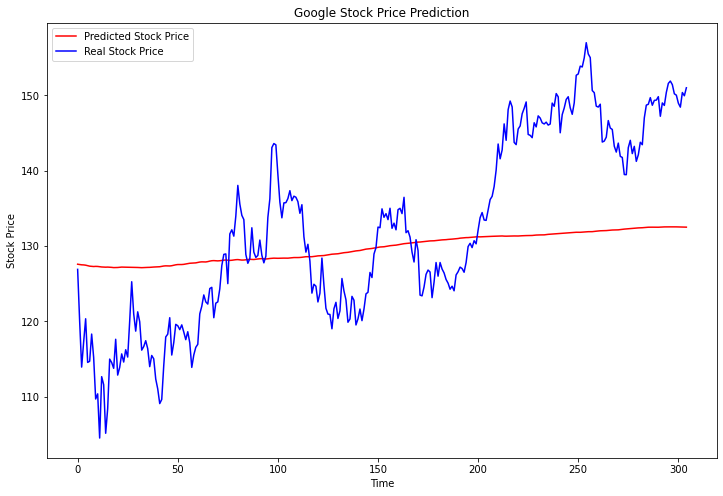

In [ ]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_stock_price_inverse,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price_original,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 2. Rice multiseries change in stock price prediction